# Text in CNV

In [1]:
import pandas as pd
import os

INPUT_FILE = 'Final_Forced_MultiOmics_Signature_Renamed.csv' 

def inspect_cnv_data():

    df = pd.read_csv(INPUT_FILE)
    cnv_cols = [col for col in df.columns if 'CNV_' in col]
    print(f"✅ 找到 {len(cnv_cols)} 个 CNV 特征列，开始详细检查...\n")
    pd.set_option('display.max_rows', None)  # 显示所有行
    pd.set_option('display.max_columns', None) # 显示所有列
    pd.set_option('display.width', 1000)     # 防止换行过窄

    all_unique_values_global = set()
    for col in cnv_cols:
        print(f"🔴 列名: {col}")
        
        unique_vals = sorted(df[col].dropna().unique())
        
        print(f"   [唯一值数量]: {len(unique_vals)} 个")
        print(f"   [具体数值列表]:")
        print(f"   {unique_vals}") # 直接打印列表，通常不会被截断
        print("   [数值分布统计 (值 -> 样本数)]:")
        counts = df[col].value_counts().sort_index()
        print(counts.to_string()) 
        for v in unique_vals:
            all_unique_values_global.add(v)
            
        print("\n" + "="*60 + "\n")

    print("🔵 [全局汇总] 所有 CNV 列中出现过的所有唯一值 (从小到大):")
    sorted_global_values = sorted(list(all_unique_values_global))
    for i, val in enumerate(sorted_global_values):
        print(f"  {i+1}. {val}")

if __name__ == "__main__":
    inspect_cnv_data()

✅ 找到 5 个 CNV 特征列，开始详细检查...

🔴 列名: CNV_VPS54
   [唯一值数量]: 7 个
   [具体数值列表]:
   [np.float64(-1.6173912818721974), np.float64(-0.6196683645837243), np.float64(0.3780545527047489), np.float64(1.375777469993222), np.float64(2.3735003872816955), np.float64(3.3712233045701687), np.float64(4.368946221858642)]
   [数值分布统计 (值 -> 样本数)]:
CNV_VPS54
-1.617391     16
-0.619668    415
 0.378055    138
 1.375777    104
 2.373500     16
 3.371223      7
 4.368946      6


🔴 列名: CNV_LINC01867
   [唯一值数量]: 7 个
   [具体数值列表]:
   [np.float64(-1.63714039509435), np.float64(-0.6290065728520398), np.float64(0.3791272493902705), np.float64(1.3872610716325808), np.float64(2.395394893874891), np.float64(3.403528716117201), np.float64(4.411662538359512)]
   [数值分布统计 (值 -> 样本数)]:
CNV_LINC01867
-1.637140     19
-0.629007    408
 0.379127    135
 1.387261    114
 2.395395     14
 3.403529      8
 4.411663      4


🔴 列名: CNV_LINC02576
   [唯一值数量]: 7 个
   [具体数值列表]:
   [np.float64(-1.657048777669473), np.float64(-0.626713753821

# Text in other

正在生成分布图和统计建议...

==================== mRNA (Gene Expression) 分布分析 ====================
包含特征数: 30 列
--------------------------------------------------
均值 (Mean)           : 0.0000
中位数 (Median)        : 0.2140
标准差 (Std)           : 1.0000
Top 5% (高表达阈值建议)    : 1.2981
Top 10% (宽松高表达)     : 1.0401
Bottom 5% (低表达阈值建议) : -1.9228
Bottom 10% (宽松低表达)  : -1.5638


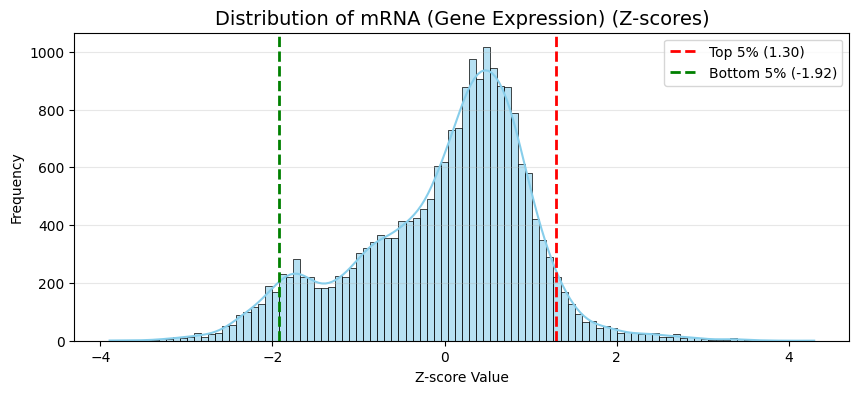


==================== Methylation (Epigenetics) 分布分析 ====================
包含特征数: 20 列
--------------------------------------------------
均值 (Mean)           : 0.0000
中位数 (Median)        : -0.0759
标准差 (Std)           : 1.0000
Top 5% (高表达阈值建议)    : 1.4978
Top 10% (宽松高表达)     : 1.3963
Bottom 5% (低表达阈值建议) : -1.4656
Bottom 10% (宽松低表达)  : -1.2745


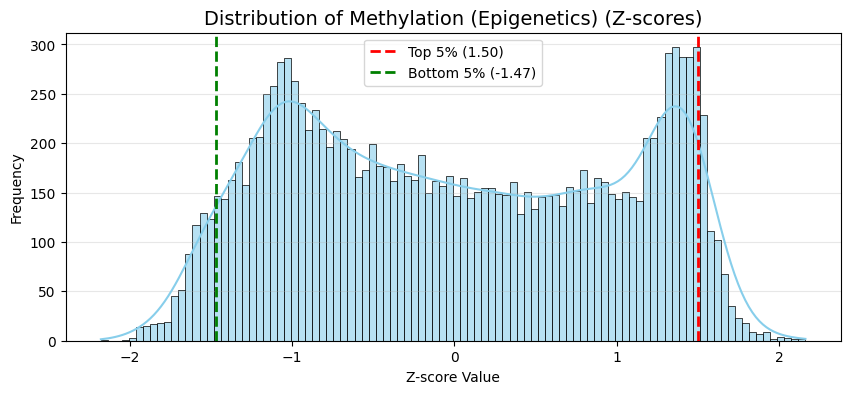


==================== miRNA (Regulation) 分布分析 ====================
包含特征数: 10 列
--------------------------------------------------
均值 (Mean)           : 0.0000
中位数 (Median)        : -0.2543
标准差 (Std)           : 1.0000
Top 5% (高表达阈值建议)    : 1.9920
Top 10% (宽松高表达)     : 1.3472
Bottom 5% (低表达阈值建议) : -1.2462
Bottom 10% (宽松低表达)  : -0.8967


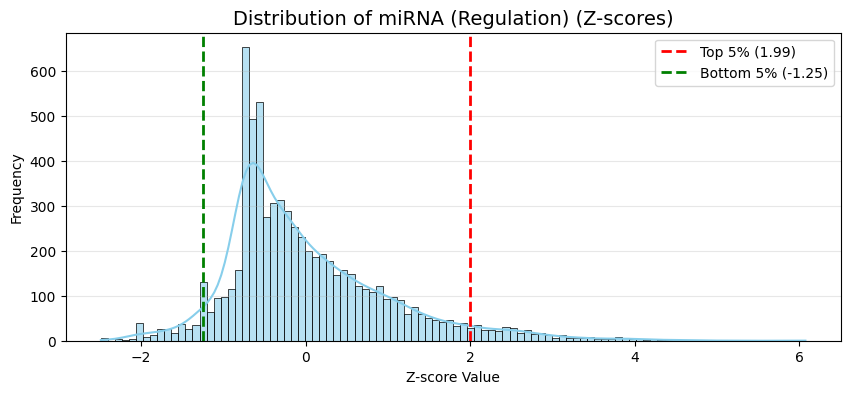

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 读取数据
file_path = 'Final_Forced_MultiOmics_Signature.csv'
df = pd.read_csv(file_path)

# 2. 定义分析函数
def analyze_omics_distribution(df, prefix, omics_name):
    # 筛选对应组学的列
    cols = [col for col in df.columns if prefix in col]
    
    if not cols:
        print(f"⚠️ 未找到 {omics_name} 相关数据列")
        return

    # 展平所有数据（把所有基因/位点的数据放在一起看整体分布）
    all_values = df[cols].values.flatten()
    
    # --- A. 计算统计指标 ---
    stats = {
        "均值 (Mean)": np.mean(all_values),
        "中位数 (Median)": np.median(all_values),
        "标准差 (Std)": np.std(all_values),
        "Top 5% (高表达阈值建议)": np.percentile(all_values, 95),
        "Top 10% (宽松高表达)": np.percentile(all_values, 90),
        "Bottom 5% (低表达阈值建议)": np.percentile(all_values, 5),
        "Bottom 10% (宽松低表达)": np.percentile(all_values, 10)
    }
    
    # --- B. 打印报告 ---
    print(f"\n{'='*20} {omics_name} 分布分析 {'='*20}")
    print(f"包含特征数: {len(cols)} 列")
    print("-" * 50)
    for k, v in stats.items():
        print(f"{k:<20}: {v:.4f}")
    
    # --- C. 绘制直方图 ---
    plt.figure(figsize=(10, 4))
    sns.histplot(all_values, bins=100, kde=True, color='skyblue', edgecolor='black', alpha=0.6)
    
    # 画出 Top/Bottom 5% 的线
    p95 = stats["Top 5% (高表达阈值建议)"]
    p05 = stats["Bottom 5% (低表达阈值建议)"]
    
    plt.axvline(p95, color='red', linestyle='--', linewidth=2, label=f'Top 5% ({p95:.2f})')
    plt.axvline(p05, color='green', linestyle='--', linewidth=2, label=f'Bottom 5% ({p05:.2f})')
    
    plt.title(f'Distribution of {omics_name} (Z-scores)', fontsize=14)
    plt.xlabel('Z-score Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    plt.show()

# 3. 执行分析 (不包含 CNV，因为 CNV 是离散的)
print("正在生成分布图和统计建议...")

# 分析 mRNA
analyze_omics_distribution(df, 'mRNA_', 'mRNA (Gene Expression)')

# 分析 Methylation
analyze_omics_distribution(df, 'Methylation_', 'Methylation (Epigenetics)')

# 分析 miRNA
analyze_omics_distribution(df, 'miRNA_', 'miRNA (Regulation)')

# Role
You are an expert Molecular Tumor Pathologist. Your task is to interpret a patient's multi-omics data row and synthesize a coherent, biologically insightful **Clinical Narrative**.

# 1. Data Cleaning
Before interpretation, simplify the feature names:
* **Gene Names**: Remove prefixes (e.g., `mRNA_FOXC1` -> **FOXC1**, `CNV_VPS54` -> **VPS54**).
* **miRNA**: Convert `miRNA_hsa-mir-934` to **miR-934**.
* **Methylation Parsing**: 
    * If name contains coordinates (e.g., `Methylation_chr14 100504766 EVL (18852)`), parse as: "**methylation site on chr14 (18852 bp from EVL)**".
    * If simple (e.g., `Methylation_LRRC6`), use "**LRRC6 methylation**".

# 2. Interpretation Thresholds (Strict Rules)
Apply these rules to filter aberrations. Do NOT output raw numbers.
* **Transcriptomics (mRNA)**:
    * **High Expression**: Z-score > 1.30
    * **Low Expression**: Z-score < -1.92
* **Epigenetics (Methylation)**:
    * **Hyper-methylation**: Z-score > 1.50
    * **Hypo-methylation**: Z-score < -1.47
* **Regulatory (miRNA)**:
    * **Upregulated**: Z-score > 1.99
    * **Downregulated**: Z-score < -1.25
* **Genomic Variations (CNV)**:
    The CNV values are strictly clustered into 5 distinct groups based on the dataset distribution. You must map the absolute value of each gene to the following fixed ranges:
     * Value < -1.10          -> Deletion (Loss)
     * -1.10 <= Value < -0.10 -> Normal (Ignore)
     * -0.10 <= Value < 0.90  -> Gain
     * 0.90 <= Value < 1.90   -> Amplification
     * Value >= 1.90          -> High-level Amplification

# 3. Narrative Structure (Omics Layering)
Structure the text logically by omics layers. Use transition phrases to weave them together:
1.  **Genomic Foundation**: Start with CNVs (e.g., "Genomic analysis reveals...").
2.  **Epigenetic Landscape**: Move to Methylation (e.g., "Epigenetically, the tumor exhibits...").
3.  **Transcriptomic Output**: Describe mRNA expression (e.g., "The transcriptomic profile is characterized by...").
4.  **Regulatory Fine-tuning**: End with miRNA (e.g., "Further regulatory dysregulation is evident in...").

# 4. Output Requirements
* **Format**: A single, coherent English paragraph (80-120 words).
* **Style**: Academic, objective, clinical report style.
* **Constraint**: Do **NOT** include raw Z-scores or rank numbers. Use qualitative terms only (High, Low, Gain, Loss). **Bold** key biological features.

# Input Data
[Insert CSV Row Here]





Patient TCGA-D8-A27H presents a distinct molecular profile characterized by the low expression of luminal markers GATA3 (Z=-2.81) and SPDEF, concurrent with high expression of basal markers FOXC1 (Z=1.35) and EN1. This aggressive transcriptional signature is accompanied by hyper-methylation of LRRC6 and the probe at chr14:100504766 (18852 bp from EVL), suggesting epigenetic silencing of tumor suppressor loci. Further regulatory complexity is evident from the upregulation of miR-934 (Z=4.44) and downregulation of miR-190b. Additionally, gains in VPS54 and CEP68 point to underlying genomic instability. Collectively, the co-occurrence of GATA3 loss and basal marker elevation, reinforced by specific methylation and miRNA aberrations, indicates a multi-layered dysregulation typical of a dedifferentiated tumor subclass.

# ENSG convert

https://biotools.fr/human/ensembl_symbol_converter
## mRNA
ENSG00000115648.14	MLPH  
ENSG00000172478.18	C2orf54  
ENSG00000179862.7	CITED4  
ENSG00000091831.24	ESR1  
ENSG00000124664.11	SPDEF  
ENSG00000173467.9	AGR3  
ENSG00000054598.9	FOXC1  
ENSG00000107485.18	GATA3  
ENSG00000106541.12	AGR2  
ENSG00000100219.16	XBP1  
ENSG00000176532.4	PRR15  
ENSG00000204385.13	SLC44A4  
ENSG00000074410.14	CA12  
ENSG00000143476.18	DTL  
ENSG00000134830.6	C5AR2  
ENSG00000109436.8	TBC1D9  
ENSG00000169083.18	AR  
ENSG00000120262.10	CCDC170  
ENSG00000168350.8	DEGS2  
ENSG00000160180.15	TFF3  
ENSG00000163879.11	DNALI1  
ENSG00000248360.7	LINC00504  
ENSG00000137975.8	CLCA2  
ENSG00000198729.5	PPP1R14C  
ENSG00000187720.14	THSD4  
ENSG00000076382.17	SPAG5  
ENSG00000165140.11	FBP1  
ENSG00000092068.20	SLC7A8  
ENSG00000163064.7	EN1  
ENSG00000178935.5	ZNF552  

## CNV
ENSG00000143952.20	VPS54  
ENSG00000225444.2	LINC01867  
ENSG00000232613.6	LINC02576  
ENSG00000143951.16	WDPCP  
ENSG00000011523.14	CEP68  


## methylation
     Probe_ID                 Gene_Annotation
1  cg22678977                           LRRC6  
2  cg27169860 chr2 66218712 **LINC02934** (29533)   
3  cg09000583                          HOXB13  
4  cg20415486  chr10 3949206 LINC02660 (4871)  
5  cg17627629   chr5 179517140 RNF130 (18026)  
6  cg04557423                       LOC727677  
7  cg03387103                           LETM1  
8  cg02003183                        CDC42BPB  
9  cg02693150                         C8orf38  
10 cg11197206     chr14 100504766 EVL (18852)  
11 cg15690342 chr5 72594851 LOC340090 (24088)  
12 cg18948877 chr2 242904738 **LINC01238** (3421)  
13 cg20456954                         ARFGEF1  
14 cg12633764                            MAPT  
15 cg25245963                            ZFAT  
16 cg11386025                           KCNQ4  
17 cg22789237  chr1 232684368 **SIPA1L2** (12934)  
18 cg03103549                          CRNKL1  
19 cg06436185                          PRKAG2  
20 cg25787812                            MICB  

## miRNA
hsa-mir-934  
hsa-mir-4728  
hsa-mir-5695  
hsa-mir-18a  
hsa-mir-190b  
hsa-mir-577  
hsa-mir-135b  
hsa-mir-2115  
hsa-mir-17  
hsa-mir-130b  



# Convert features matrix


In [8]:
import pandas as pd
import re
import os

base_map = {
    # --- mRNA ---
    "ENSG00000115648.14": "MLPH",
    "ENSG00000172478.18": "C2orf54",
    "ENSG00000179862.7": "CITED4",
    "ENSG00000091831.24": "ESR1",
    "ENSG00000124664.11": "SPDEF",
    "ENSG00000173467.9": "AGR3",
    "ENSG00000054598.9": "FOXC1",
    "ENSG00000107485.18": "GATA3",
    "ENSG00000106541.12": "AGR2",
    "ENSG00000100219.16": "XBP1",
    "ENSG00000176532.4": "PRR15",
    "ENSG00000204385.13": "SLC44A4",
    "ENSG00000074410.14": "CA12",
    "ENSG00000143476.18": "DTL",
    "ENSG00000134830.6": "C5AR2",
    "ENSG00000109436.8": "TBC1D9",
    "ENSG00000169083.18": "AR",
    "ENSG00000120262.10": "CCDC170",
    "ENSG00000168350.8": "DEGS2",
    "ENSG00000160180.15": "TFF3",
    "ENSG00000163879.11": "DNALI1",
    "ENSG00000248360.7": "LINC00504",
    "ENSG00000137975.8": "CLCA2",
    "ENSG00000198729.5": "PPP1R14C",
    "ENSG00000187720.14": "THSD4",
    "ENSG00000076382.17": "SPAG5",
    "ENSG00000165140.11": "FBP1",
    "ENSG00000092068.20": "SLC7A8",
    "ENSG00000163064.7": "EN1",
    "ENSG00000178935.5": "ZNF552",

    # --- Methylation ---
    "cg22678977": "LRRC6",
    "cg27169860": "chr2 66218712 LINC02934 (29533)",
    "cg09000583": "HOXB13",
    "cg20415486": "chr10 3949206 LINC02660 (4871)",
    "cg17627629": "chr5 179517140 RNF130 (18026)",
    "cg04557423": "LOC727677",
    "cg03387103": "LETM1",
    "cg02003183": "CDC42BPB",
    "cg02693150": "C8orf38",
    "cg11197206": "chr14 100504766 EVL (18852)",
    "cg15690342": "chr5 72594851 LOC340090 (24088)",
    "cg18948877": "chr2 242904738 LINC01238 (3421)",
    "cg20456954": "ARFGEF1",
    "cg12633764": "MAPT",
    "cg25245963": "ZFAT",
    "cg11386025": "KCNQ4",
    "cg22789237": "chr1 232684368 SIPA1L2 (12934)",
    "cg03103549": "CRNKL1",
    "cg06436185": "PRKAG2",
    "cg25787812": "MICB",

    # --- CNV ---
    "ENSG00000143952.20": "VPS54",
    "ENSG00000225444.2": "LINC01867",
    "ENSG00000232613.6": "LINC02576",
    "ENSG00000143951.16": "WDPCP",
    "ENSG00000011523.14": "CEP68",

}

input_file = "Final_Forced_MultiOmics_Signature.csv" 
output_file = "Final_Forced_MultiOmics_Signature_Renamed.csv"

def rename_column(col_name):
    if col_name == "PatientID":
        return col_name
    
    parts = col_name.split('_', 1)
    if len(parts) < 2:
        return col_name
    
    prefix = parts[0]
    clean_id = parts[1]
    if prefix == "miRNA":
        return col_name

    if clean_id in base_map:
        new_gene_name = base_map[clean_id]

        return f"{prefix}_{new_gene_name}"


if os.path.exists(input_file):
    df = pd.read_csv(input_file) 
    df.columns = [rename_column(col) for col in df.columns]
    df.to_csv(output_file, index=False, encoding='utf-8-sig')


# prompt

I need you to act as a "Lead Prompt Engineer". I have a complex task for an LLM: acting as a Molecular Tumor Pathologist to interpret multi-omics data.

Your goal is to design 10 distinct Prompt Variations for this task.

### THE CORE LOGIC (MUST be included in ALL 10 prompts)

**1. Input Data:**
   - The user will provide a string representing a single CSV row of multi-omics data (e.g., "mRNA_GeneA: 2.5, CNV_GeneB: -1.6...").

**2. Data Pre-processing Rules:**
   - **Prefix Removal:** Strip prefixes like "mRNA_", "CNV_" to leave only the gene name.
   - **miRNA Standardization:** Convert "miRNA_hsa-mir-xxx" or "hsa-miR-xxx" to "miR-xxx".
   - **Methylation Parsing:** If the feature name is long (e.g., "Methylation_chr2 66218712..."), extract only the location in the format "chrN:Position". If it is a simple gene name, keep it as is.

**3. Diagnostic Thresholds (Strict Logic, No Calculations):**
   *Apply these rules to determine the biological status. Do NOT output the raw numbers.*

   - **mRNA (Transcriptomic):**
     * High: Z > 1.30
     * Low: Z < -1.92
   
   - **Methylation (Epigenetic):**
     * Hyper-methylated: Z > 1.50
     * Hypo-methylated: Z < -1.47
   
   - **miRNA (Regulatory):**
     * Upregulated: Z > 1.99
     * Downregulated: Z < -1.25

   - **CNV (Genomic) - FIXED RANGES:**
     *The CNV values are discrete clusters. Map the SIGNED value (do not use absolute value) to these statuses:*
     * Value < -1.10          -> **Deletion (Loss)**
     * -1.10 <= Value < -0.10 -> **Normal** (Ignore)
     * -0.10 <= Value < 0.90  -> **Gain**
     * 0.90 <= Value < 1.90   -> **Amplification**
     * Value >= 1.90          -> **High-level Amplification**

**4. Narrative Structure:**
   The report must follow this strict biological flow:
   1. **Genomic** (CNV findings)
   2. **Epigenetic** (Methylation findings)
   3. **Transcriptomic** (mRNA findings)
   4. **Regulatory** (miRNA findings)

**5. Output Format:**
   - A single, sophisticated academic paragraph.
   - **Bold** all significant biological findings (e.g., "**amplification of EGFR**").
   - Length: 80-120 words.
   - Tone: Clinical, precise, and authoritative.

---

### YOUR TASK: GENERATE 10 PROMPT VARIATIONS

Create 10 different prompts that incorporate the Core Logic above, but utilize the following distinct prompt engineering strategies. Please separate each prompt clearly.

**1. The "Role-Play" Persona**
   (Focus heavily on acting as a board-certified pathologist, using deep medical jargon and professional tone.)

**2. The "Chain-of-Thought" (CoT)**
   (Instruct the model to "Think step-by-step" before generating the final report. Ask it to explicitly list the detected features in a scratchpad before writing.)

**3. The "Few-Shot" Prompt**
   (Include a generated example of an Input Row and the perfect Output Report to teach the model by example.)

**4. The "Negative Constraints" Focus**
   (Focus heavily on what NOT to do: e.g., "Do not mention normal values," "Do not show math," "Do not deviate from the order.")

**5. The "Step-by-Step Execution"**
   (Break the instructions down into a numbered list of executable steps: Step 1: Clean data, Step 2: Apply CNV filters, etc.)

**6. The "Data Processing" Specialist**
   (Emphasize the string manipulation and cleaning rules to ensure the gene names are perfectly formatted before analysis.)

**7. The "Structured Output" (JSON-to-Text)**
   (Ask the model to first extract findings into a JSON structure, and then convert that JSON into the final narrative.)

**8. The "Comparative Analyst"**
   (Frame the prompt as looking for a "Molecular Signature" that drives the tumor's pathology, connecting the layers.)

**9. The "Concise & Token-Efficient"**
   (A highly compressed, minimal prompt that saves API tokens but retains all strict logic. Remove all fluff.)

**10. The "Editor/Refiner"**
    (Instruct the model to draft a report, critique it against the thresholds, and then output only the polished final version.)